# ESCUELA POLITECNICA NACIONAL
# Proyecto 1er Bimestre Analisis de Delitos en Nueva York en lo que va del 2019
## NOMBRE: Alvarez Naranjo Miguel Esteban

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon


## objetivos

In [4]:
path_guardado = 'C:/Users/MIGUELESTEBAN/Documents/GitHub/py-alvarez-naranjo-miguel-esteban/Proyecto 1er Bim/Data/NYPD_Complaint_Data_Current__Year_To_Date_.pickle'
path_mapa = 'C:/Users/MIGUELESTEBAN/Documents/GitHub/py-alvarez-naranjo-miguel-esteban/Proyecto 1er Bim/Data/citymap_citymap_v1/citymap_citymap_v1.shp'
df = pd.read_pickle(path_guardado)
# tipar la fecha con tipo date
df['CMPLNT_FR_DT'] = pd.to_datetime(df.CMPLNT_FR_DT)
df 

CMPLNT_NUM  ADDR_PCT_CD        BORO_NM CMPLNT_FR_DT CMPLNT_FR_TM  \
0        251527331          114         QUEENS   2019-03-31     23:50:00   
1        440213705          114         QUEENS   2019-03-31     23:50:00   
2        607477539           45          BRONX   2019-03-31     23:00:00   
3        356729172          109         QUEENS   2019-03-31     23:00:00   
4        225899019           46          BRONX   2019-03-31     23:00:00   
5        976336258           42          BRONX   2019-03-31     22:50:00   
6        615288235          106         QUEENS   2019-03-31     22:45:00   
7        588158718           10      MANHATTAN   2019-03-31     22:45:00   
8        857612199           40          BRONX   2019-03-31     22:35:00   
9        628874720          100         QUEENS   2019-03-31     22:30:00   
10       237012561           73       BROOKLYN   2019-03-31     22:30:00   
11       642412511          106         QUEENS   2019-03-31     22:30:00   
12       188089252           70       BROOKLYN   2019-03-31     22:25:00   
13       586879480          121  STATEN ISLAND   2019-03-31     22:21:00   
14       636715973           78       BROOKLYN   2019-03-31     22:20:00   
15       461253737           75       BROOKLYN   2019-02-04     09:30:00   
16       720889291          114         QUEENS   2019-03-31     22:20:00   
17       910931755          113         QUEENS   2019-03-31     22:15:00   
18       515631073           81       BROOKLYN   2019-03-31     22:14:00   
19       466116131           43          BRONX   2019-03-31     22:10:00   
20       273467776           40          BRONX   2019-03-31     22:07:00   
21       846845776           70       BROOKLYN   2019-03-31     22:05:00   
22       775717057            1      MANHATTAN   2019-03-31     22:00:00   
23       188394406          104         QUEENS   2019-03-31     22:00:00   
24       430542009           18      MANHATTAN   2019-03-31     22:00:00   
25       769762654          120  STATEN ISLAND   2019-03-31     22:00:00   
26       923875610          104         QUEENS   2019-03-31     22:00:00   
27       217873114           61       BROOKLYN   2019-03-31     22:00:00   
28       694073607           33      MANHATTAN   2019-03-31     21:55:00   
29       402679731           40          BRONX   2019-03-31     21:50:00   
...            ...          ...            ...          ...          ...   
105039   391672254          101         QUEENS   2018-12-07     21:00:00   
105040   284721929          120  STATEN ISLAND   2018-12-07     12:30:00   
105041   575658321          120  STATEN ISLAND   2018-12-07     12:00:00   
105042   692275819           66       BROOKLYN   2018-12-07     10:42:00   
105043   112309635           14      MANHATTAN   2018-12-07     09:00:00   
105044   931573776          122  STATEN ISLAND   2018-12-06     19:00:00   
105045   552176049           79       BROOKLYN   2018-12-03     09:00:00   
105046   885971123          123  STATEN ISLAND   2018-12-02     12:00:00   
105047   346315482          103         QUEENS   2018-12-01     12:00:00   
105048   194774035           62       BROOKLYN   2018-12-01     09:00:00   
105049   609610620          102         QUEENS   2018-11-28     16:54:00   
105050   553237569          113         QUEENS   2018-11-25     23:51:00   
105051   421503719           43          BRONX   2018-11-22     08:00:00   
105052   104061764          109         QUEENS   2018-11-21     16:00:00   
105053   285923710           19      MANHATTAN   2018-11-20     16:25:00   
105054   399754860           67       BROOKLYN   2018-11-20     00:01:00   
105055   585943417           61       BROOKLYN   2018-11-13     18:00:00   
105056   602853607           84       BROOKLYN   2018-11-11     19:09:00   
105057   216395309           14      MANHATTAN   2018-10-05     18:00:00   
105058   670697737           70       BROOKLYN   2018-09-12     22:35:00   
105059   984412570           24      MANHATTAN   2018-08

In [9]:
# crear datafreames por anios
QUEENS = df['BORO_NM'] == 'QUEENS'

df_QUEENS = df[QUEENS]

BRONX = df['BORO_NM'] == 'BRONX'

df_BRONX = df[BRONX]

MANHATTAN = df['BORO_NM'] == 'MANHATTAN'

df_MANHATTAN = df[MANHATTAN]

BROOKLYN = df['BORO_NM'] == 'BROOKLYN'

df_BROOKLYN = df[BROOKLYN]

STATEN_ISLAND = df['BORO_NM'] == 'STATEN ISLAND'

df_STATEN_ISLAND = df[STATEN_ISLAND]

BarrioDesconocido = df['BORO_NM'] == ''

df_BarrioDesconocido = df[BarrioDesconocido]

df.count()

# filtrar barrios por fecha de 2019


df_QUEENS2019 = df_QUEENS.loc[df_QUEENS.CMPLNT_FR_DT >= '2019-01-01']
df_BRONX2019 = df_BRONX.loc[df_BRONX.CMPLNT_FR_DT >= '2019-01-01']
df_MANHATTAN2019 = df_MANHATTAN.loc[df_MANHATTAN.CMPLNT_FR_DT >= '2019-01-01']
df_BROOKLYN2019 = df_BROOKLYN.loc[df_BROOKLYN.CMPLNT_FR_DT >= '2019-01-01']
df_STATEN_ISLAND2019 = df_STATEN_ISLAND.loc[df_STATEN_ISLAND.CMPLNT_FR_DT >= '2019-01-01']


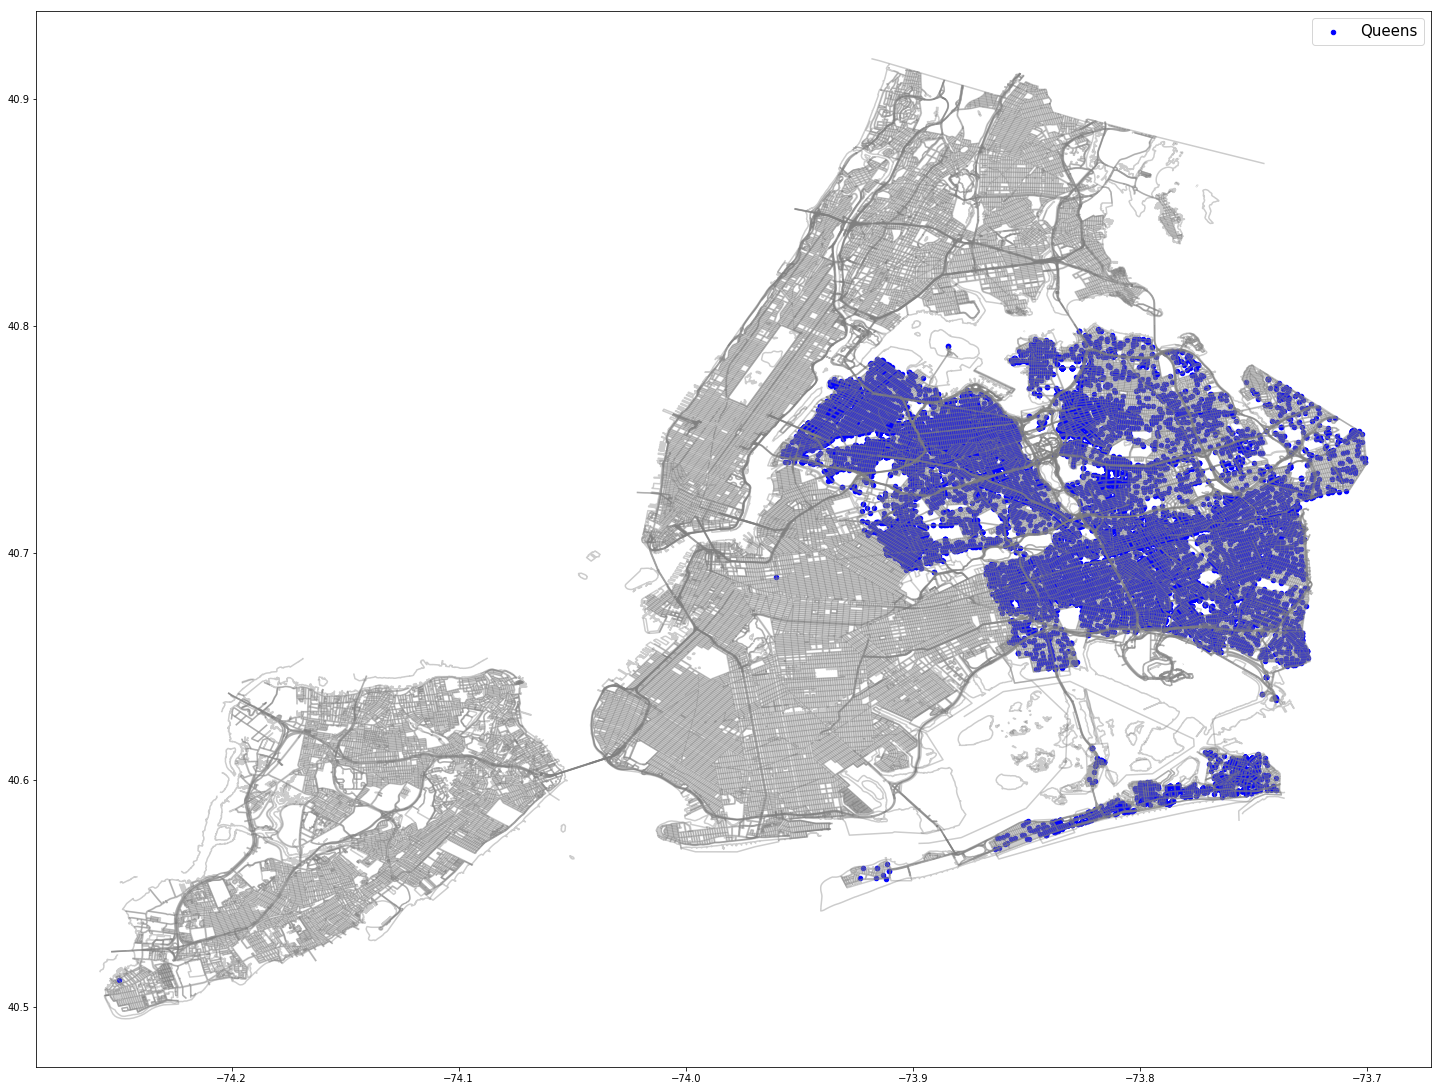

In [29]:

# graficar el mapa
NY_street_map = gpd.read_file(path_mapa)
crs = {'init': 'epsg:4326'} #coordinate reference system

fig,ax = plt.subplots(figsize = (25,25))
NY_street_map.plot(ax = ax, alpha = 0.4, color = 'grey')

     
geometry = [Point(xy) for xy in zip(df_QUEENS2019['Longitude'], df_QUEENS2019['Latitude'])]
geometry[:3]
geo_df = gpd.GeoDataFrame(df_QUEENS2019, #specify our data
                          crs = crs, #specify our coordinate reference system
                         geometry = geometry) #specify the geometry list we created

geo_df[geo_df['BORO_NM'] == 'QUEENS'].plot(ax = ax, markersize = 20, color = 'blue', marker = 'o', label = 'Queens')

plt.legend(prop={'size':15})

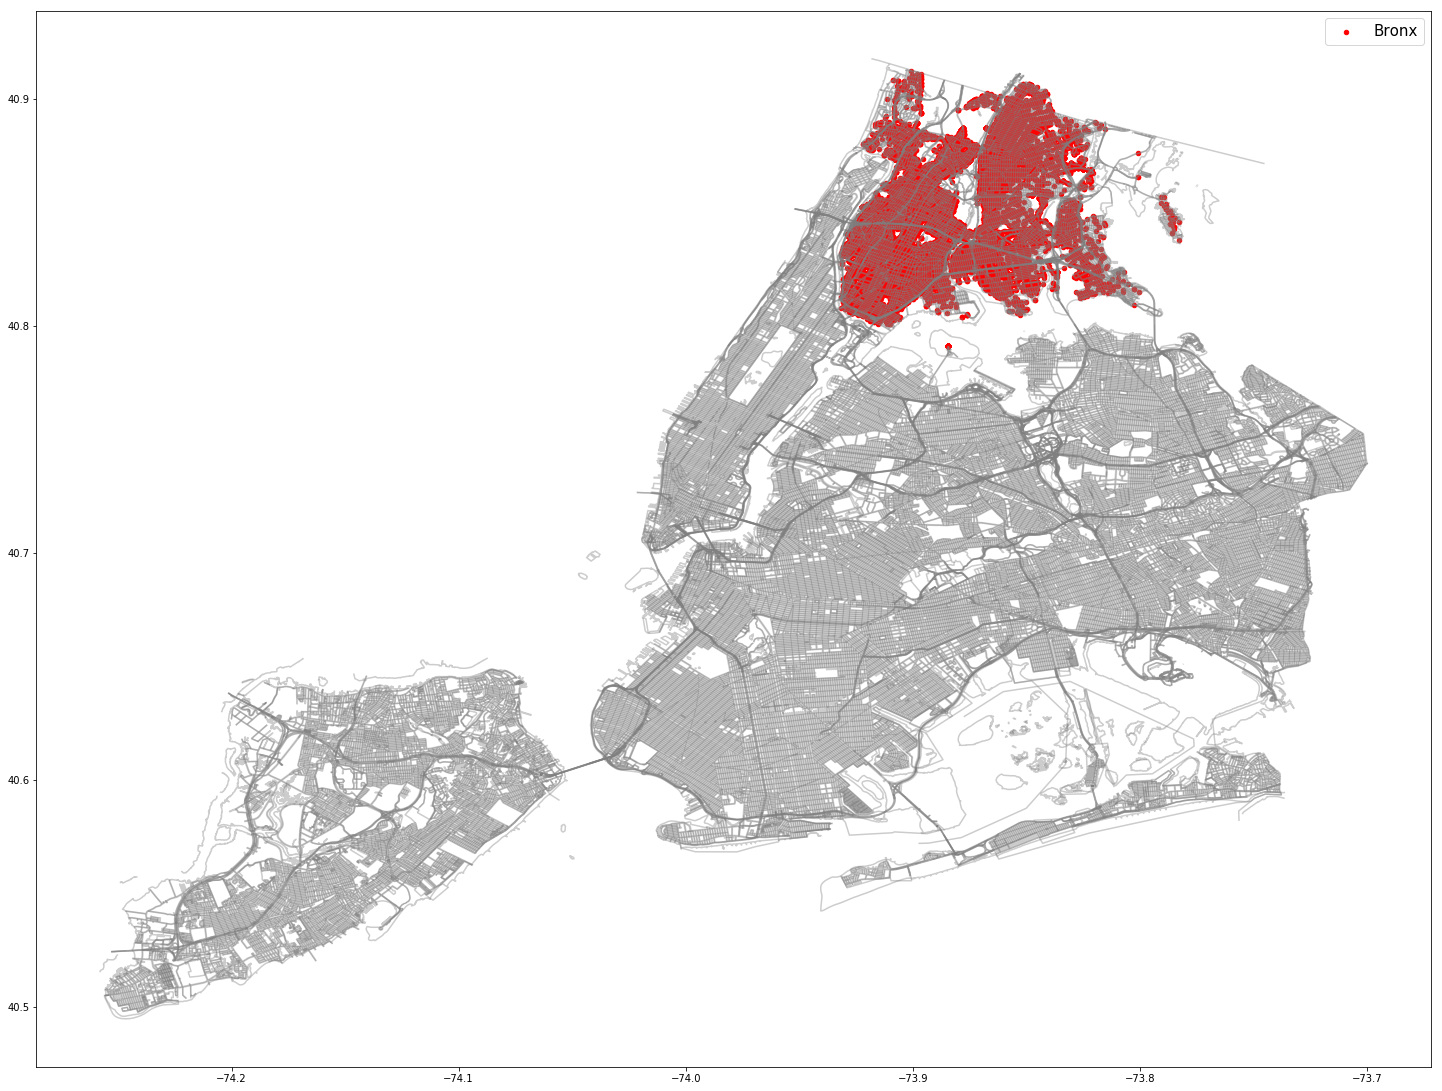

In [30]:
fig,ax = plt.subplots(figsize = (25,25))
NY_street_map.plot(ax = ax, alpha = 0.4, color = 'grey')

     
geometry = [Point(xy) for xy in zip(df_BRONX2019['Longitude'], df_BRONX2019['Latitude'])]
geometry[:3]
geo_df = gpd.GeoDataFrame(df_BRONX2019, #specify our data
                          crs = crs, #specify our coordinate reference system
                         geometry = geometry) #specify the geometry list we created

geo_df[geo_df['BORO_NM'] == 'BRONX'].plot(ax = ax, markersize = 20, color = 'red', marker = 'o', label = 'Bronx')

plt.legend(prop={'size':15})

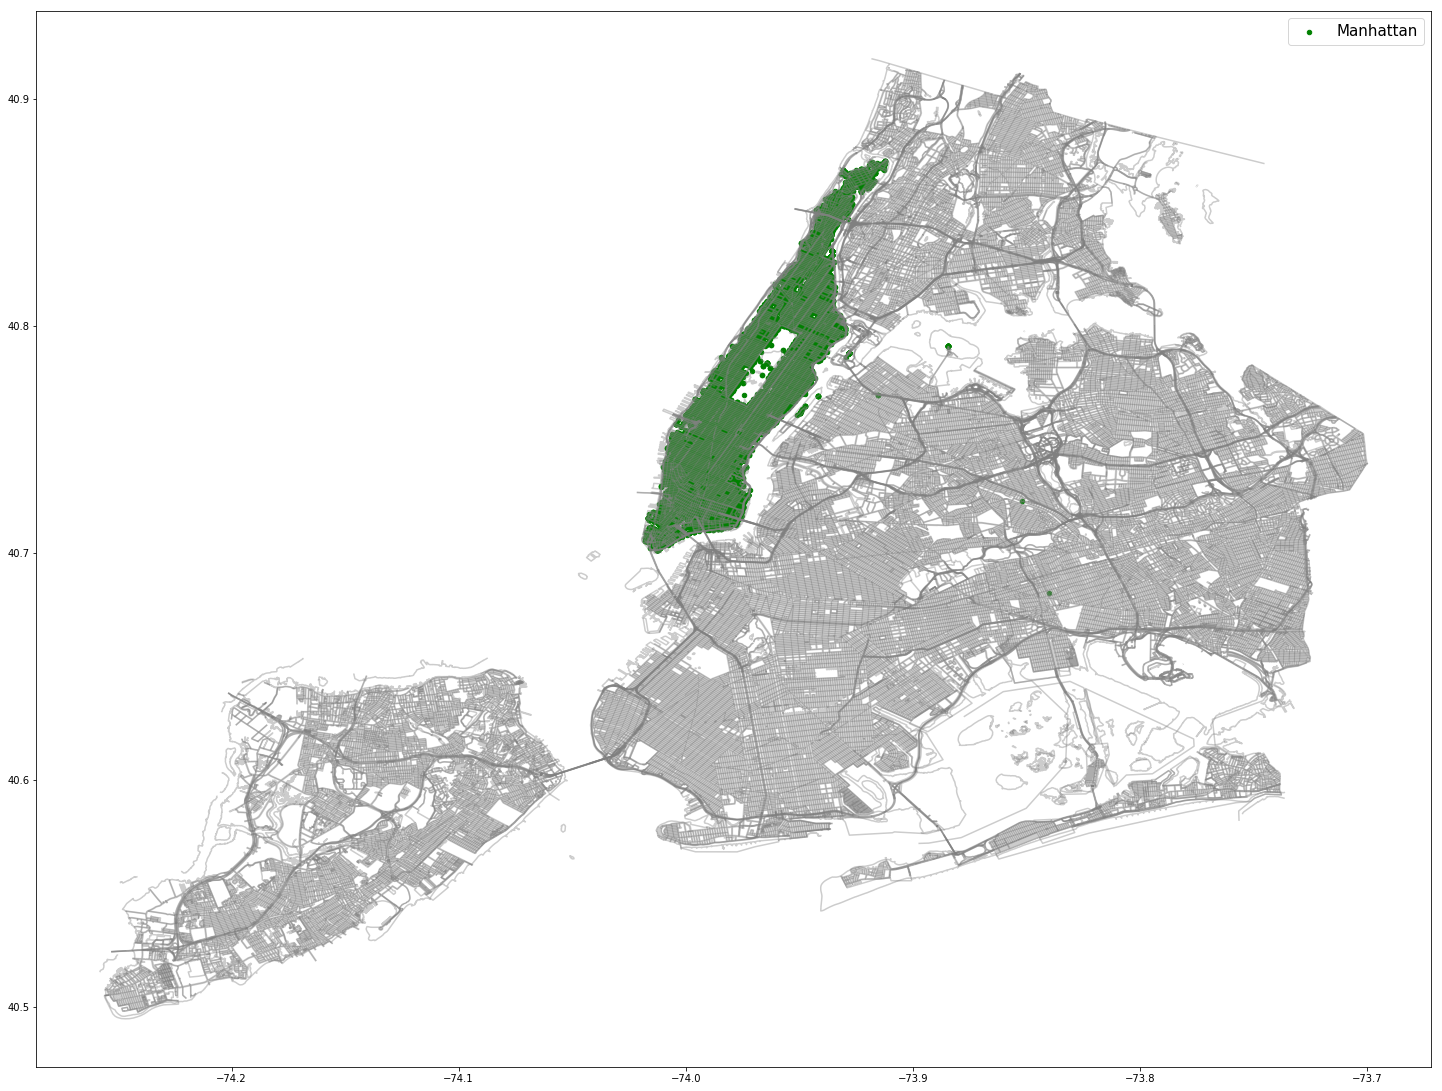

In [31]:

fig,ax = plt.subplots(figsize = (25,25))
NY_street_map.plot(ax = ax, alpha = 0.4, color = 'grey')

     
geometry = [Point(xy) for xy in zip(df_MANHATTAN2019['Longitude'], df_MANHATTAN2019['Latitude'])]
geometry[:3]
geo_df = gpd.GeoDataFrame(df_MANHATTAN2019, #specify our data
                          crs = crs, #specify our coordinate reference system
                         geometry = geometry) #specify the geometry list we created

geo_df[geo_df['BORO_NM'] == 'MANHATTAN'].plot(ax = ax, markersize = 20, color = 'green', marker = 'o', label = 'Manhattan')

plt.legend(prop={'size':15})

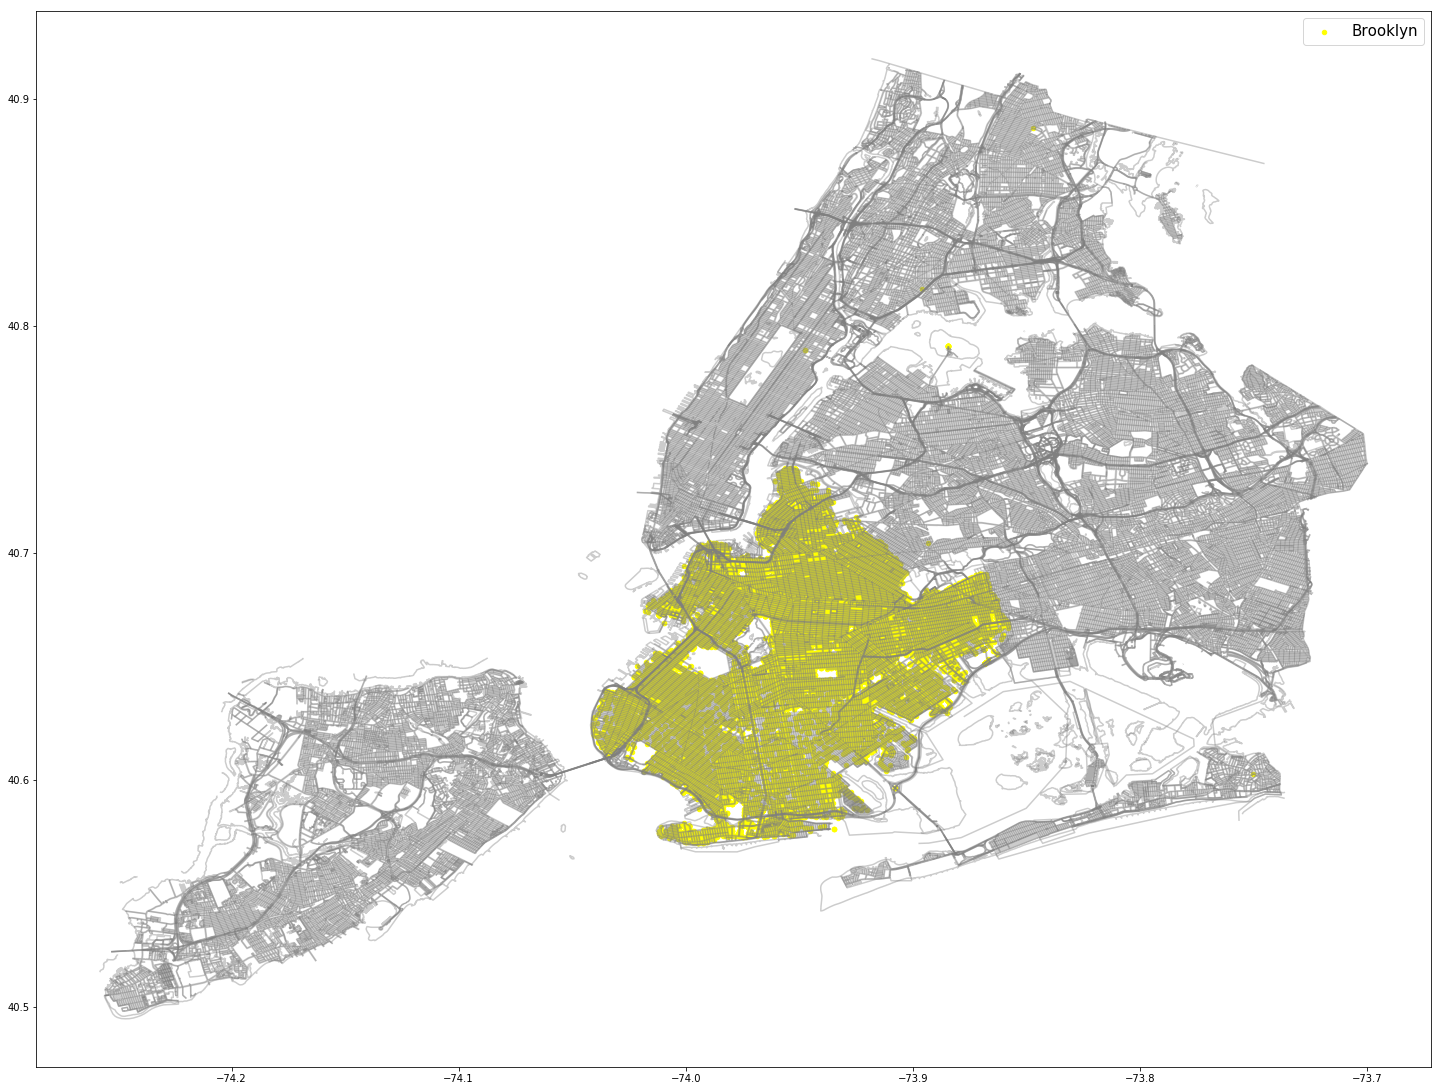

In [32]:
fig,ax = plt.subplots(figsize = (25,25))
NY_street_map.plot(ax = ax, alpha = 0.4, color = 'grey')

     
geometry = [Point(xy) for xy in zip(df_BROOKLYN2019['Longitude'], df_BROOKLYN2019['Latitude'])]
geometry[:3]
geo_df = gpd.GeoDataFrame(df_BROOKLYN2019, #specify our data
                          crs = crs, #specify our coordinate reference system
                         geometry = geometry) #specify the geometry list we created

geo_df[geo_df['BORO_NM'] == 'BROOKLYN'].plot(ax = ax, markersize = 20, color = 'yellow', marker = 'o', label = 'Brooklyn')

plt.legend(prop={'size':15})

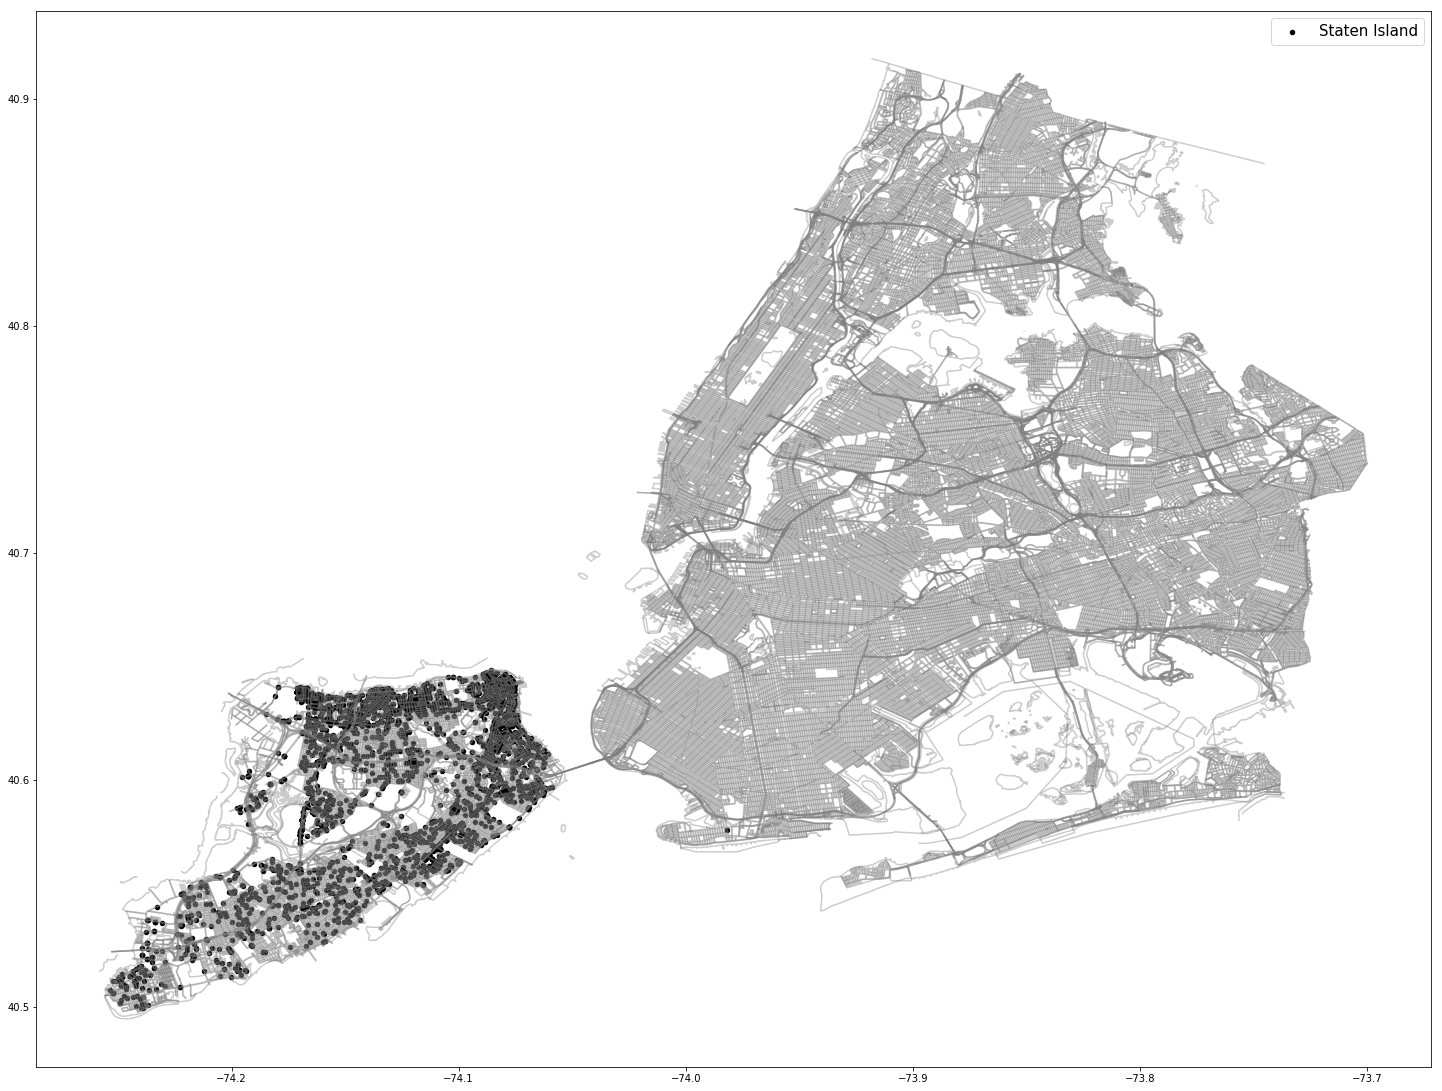

In [35]:
fig,ax = plt.subplots(figsize = (25,25))
NY_street_map.plot(ax = ax, alpha = 0.4, color = 'grey')

     
geometry = [Point(xy) for xy in zip(df_STATEN_ISLAND2019['Longitude'], df_STATEN_ISLAND2019['Latitude'])]
geometry[:3]
geo_df = gpd.GeoDataFrame(df_STATEN_ISLAND2019, #specify our data
                          crs = crs, #specify our coordinate reference system
                         geometry = geometry) #specify the geometry list we created

geo_df[geo_df['BORO_NM'] == 'STATEN ISLAND'].plot(ax = ax, markersize = 20, color = 'black', marker = 'o', label = 'Staten Island')

plt.legend(prop={'size':15})